In [9]:
import os
os.chdir('/data/wjk/Workspace/Datasets/IGR')

import os.path as osp
import pandas as pd
pd.set_option('display.width', 500)    #设置整体宽度
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mtools import plot_cdf, plot_fig, load_json

df = pd.read_csv('Output/stat_df.csv')
exclude_phone = ['Mi8']
df=df[~df.isin(exclude_phone)]
df["err_h"]*=100
df["err_x"]*=100
df["err_y"]*=100
df["length"] = np.sqrt(df["gt_x"]**2 + df["gt_y"]**2)
pdf = df.rename(columns={'err_x':'Noise east (cm)','err_y':'Noise north (cm)', 'phone':'Device'})

route_type_dict = load_json(osp.join('plots', 'route_type_dict.json'))
train_type_dict = load_json(osp.join('plots', 'train_type_dict.json'))
pdf["Route type"] = pdf["trip"]
pdf["Train type"] = pdf["trip"]

for route in route_type_dict:
    pdf.loc[pdf.__getattr__("Route type") == route, ('Route type')] = route_type_dict[route]
for route in train_type_dict:
    pdf.loc[pdf.__getattr__("Train type") == route, ('Train type')] = train_type_dict[route]

print(df.groupby('phone').mean(numeric_only=True))

              err_x     err_y      err_h      gt_x      gt_y    length
phone                                                                 
Mate30_2  -0.627853 -0.863726  23.696777  0.083088  0.031022  1.071175
Mate50    -0.379855  0.194486  18.429703 -0.007102 -0.041847  1.190662
Nova9pro   0.064342 -0.219210  19.731772  0.034121 -0.017677  1.085160
Oneplus9r -0.189481 -0.173499  19.298517  0.033569 -0.014066  1.085149


In [10]:
df[["err_x","err_y","gt_x","gt_y"]].corr().to_csv('Output/corr.csv')
des = df.groupby('phone')["err_h"].describe(percentiles=[.2, .25, .5, .75, .8, 0.9])
print(des)
# des.to_csv('Output/error_info.csv')

des = pdf.groupby('Route type')["err_h"].describe(percentiles=[.2, .25, .5, .75, .8, 0.9])
print(des)
# des.to_csv('Output/error_info_bytype.csv')

des = df.groupby('phone')["length"].describe(percentiles=[.2, .25, .5, .75, .8, 0.9])
print(des)
# des.to_csv('Output/length_info.csv')

            count       mean        std       min        20%        25%        50%        75%        80%        90%         max
phone                                                                                                                          
Mate30_2    980.0  23.696777  16.183627  1.363072  11.270620  12.907802  19.782735  29.808595  33.386502  44.514019  107.614855
Mate50     1000.0  18.429703  21.575616  0.533534   7.764647   9.031372  14.549930  21.590822  23.472867  30.707702  297.333582
Nova9pro    979.0  19.731772  11.279339  0.644827   9.908270  10.978064  17.569546  27.027130  29.229894  35.592415   65.471202
Oneplus9r   978.0  19.298517  12.418999  0.924203   8.658940  10.349912  17.264589  25.162766  27.583451  34.571407  125.772934
             count       mean        std       min       20%        25%        50%        75%        80%        90%         max
Route type                                                                                              

In [11]:
# pdf.columns
item_index = pdf.columns.to_list().index('Train type')
print(pdf.columns.to_list())

train_pdf = pdf.loc[pdf['Train type']=='train']
des = train_pdf.groupby('Device')["err_h"].describe(percentiles=[.2, .25, .5, .75, .8, 0.9])
print(des)

['Noise east (cm)', 'Noise north (cm)', 'err_h', 'gt_x', 'gt_y', 'Device', 'trip', 'length', 'Route type', 'Train type']
Empty DataFrame
Columns: [count, mean, std, min, 20%, 25%, 50%, 75%, 80%, 90%, max]
Index: []


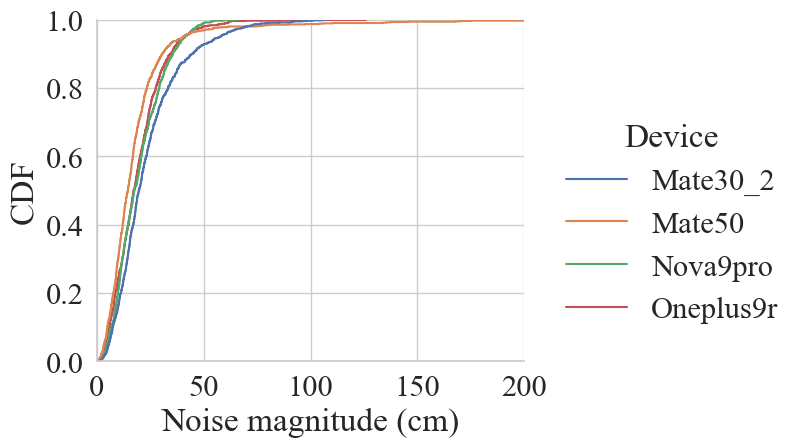

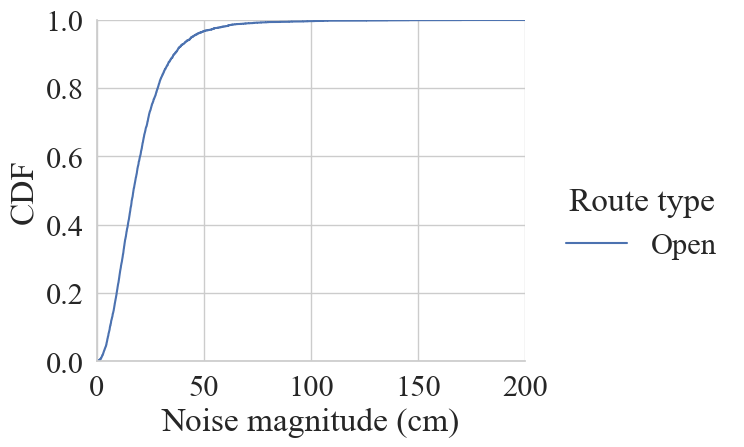

In [12]:
# g = plot_cdf(df, 'err_h', xlabel='Noise magnitude (cm)', xlim=[0, 200], plot_params={'aspect':1.2})
# plt.show()
# g.savefig('Figures/err_h_cdf.png', dpi=150, pad_inches=0.2)

g = plot_cdf(pdf, 'err_h', xlabel='Noise magnitude (cm)', xlim=[0, 200], fig_param={'font_scale':2.0}, plot_params={'aspect':1.2, 'hue':'Device'}) # 'col':'phone', 'col_wrap': 4
plt.show()
# g.savefig('Figures/err_h_cdf_byphone.png', dpi=150, pad_inches=0.2)

g = plot_cdf(pdf, 'err_h', xlabel='Noise magnitude (cm)', xlim=[0, 200], fig_param={'font_scale':2.0}, plot_params={'aspect':1.2, 'hue':'Route type'}) # 'col':'phone', 'col_wrap': 4
plt.show()
# g.savefig('Figures/err_h_cdf_bytype.png', dpi=150, pad_inches=0.2)

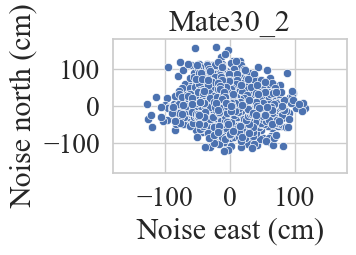

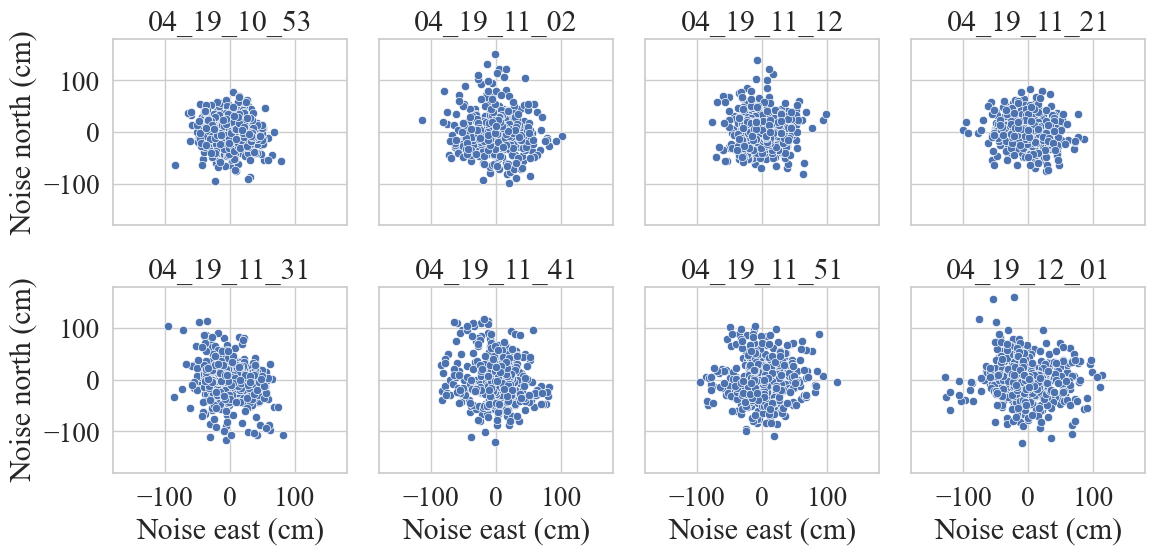

In [5]:
sns.set(**{'style':'whitegrid', 'font_scale':1.8, 'font':'Times New Roman'})
g = sns.FacetGrid(pdf, col="Device",  col_wrap=4, xlim=[-180, 180], ylim=[-180, 180], despine=False)
g.map(sns.scatterplot, "Noise east (cm)", "Noise north (cm)")
g.set_titles("{col_name}")

plt.show()
# g.savefig('Figures/err_scatter_byphone.png', dpi=150, pad_inches=0.2)

sns.set(**{'style':'whitegrid', 'font_scale':1.8, 'font':'Times New Roman'})
g = sns.FacetGrid(pdf, col="Route type",  col_wrap=4, xlim=[-180, 180], ylim=[-180, 180], despine=False)
g.map(sns.scatterplot, "Noise east (cm)", "Noise north (cm)")
g.set_titles("{col_name}")
plt.show()
# g.savefig('Figures/err_scatter_bytype.png', dpi=150, pad_inches=0.2)

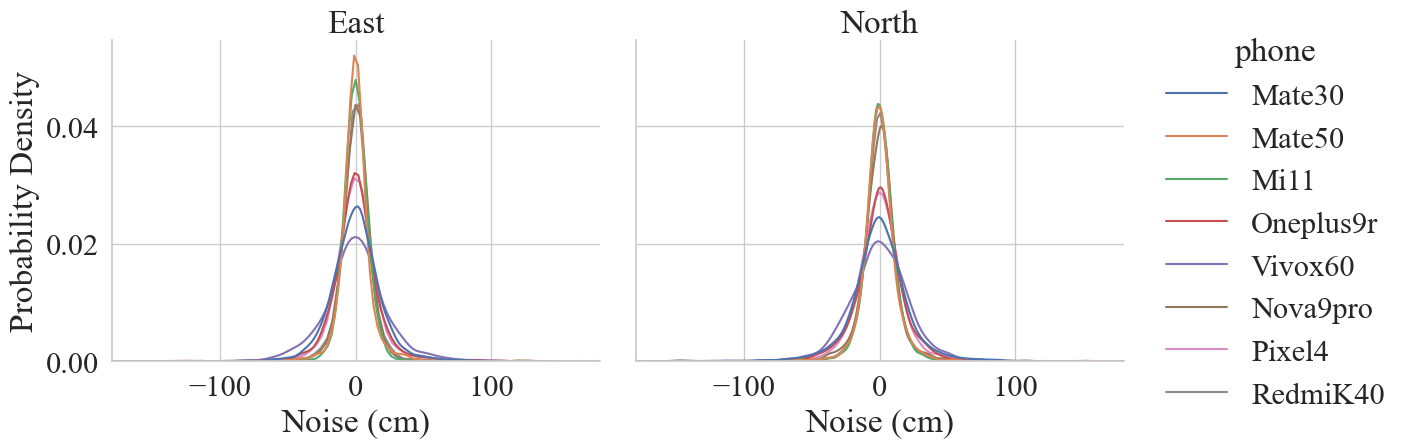

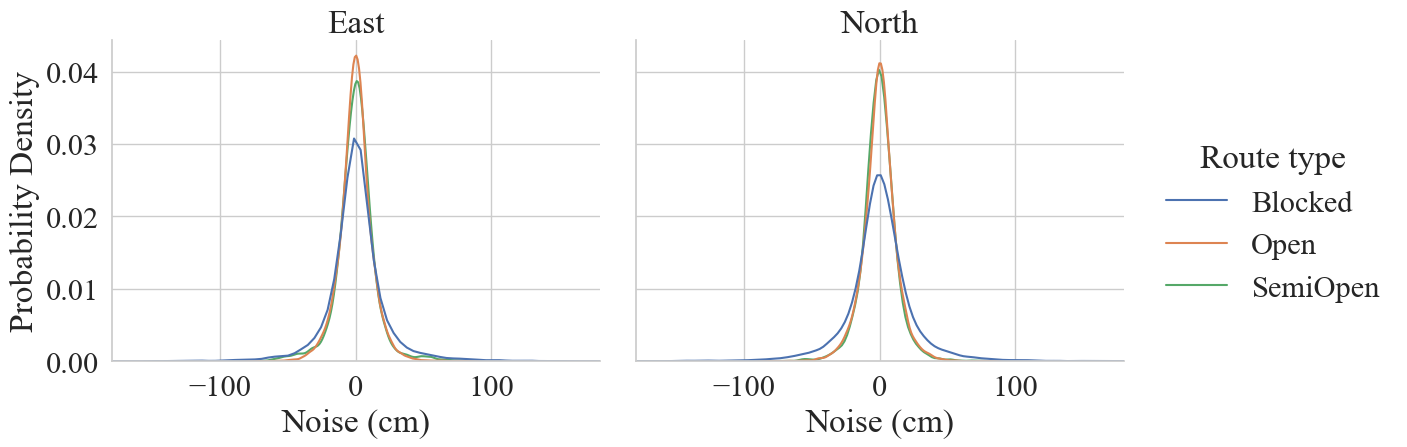

In [16]:
import numpy as np
new_df = pd.DataFrame({
    'err': np.hstack((df['err_x'].values, df['err_y'].values)),
    'phone': np.hstack((df['phone'].values, df['phone'].values)),
    'type': ['East']*len(pdf) + ['North']*len(pdf)
})
g = plot_fig(sns.displot, new_df, xlim=[-180, 180], xlabel='Noise (cm)', ylabel='Probability Density', fig_param={'font_scale':2.0}, plot_params={'x':'err', 'kind':'kde', 'aspect':1.2, 'hue':'phone', 'common_norm':False, 'col': 'type'}) # 
g.set_titles("{col_name}")
plt.show()
g.savefig('Figures/err_dist_byphone.png', dpi=150, pad_inches=0.2)

new_df = pd.DataFrame({
    'err': np.hstack((df['err_x'].values, df['err_y'].values)),
    'Route type': np.hstack((pdf['Route type'].values, pdf['Route type'].values)),
    'type': ['East']*len(pdf) + ['North']*len(pdf)
})
g = plot_fig(sns.displot, new_df, xlim=[-180, 180], xlabel='Noise (cm)', ylabel='Probability Density', fig_param={'font_scale':2.0}, plot_params={'x':'err', 'kind':'kde', 'aspect':1.2, 'hue':'Route type', 'common_norm':False, 'col': 'type'}) # 
g.set_titles("{col_name}")
plt.show()
g.savefig('Figures/err_dist_bytype.png', dpi=150, pad_inches=0.2)